In [59]:
# def checkCategorical(data_frame, column, approved_list):

def checkCategorical(data_frame, column, approved_list):
    _counts = df[column].value_counts()
    not_in_list = 0
    for x in _counts.index.tolist():
        if x not in approved_list: 
            print(x)
            not_in_list += 1
    print('{} {} categories found that were not in the official {} list.'.format(not_in_list, column, column))
    print(_counts)

In [60]:
# def plotContinuous(data_frame, x, y, marker_size, size):

def plotContinuous(data_frame, x, y, marker_size, size):
    groups = data_frame.groupby('y')
    p = 0
    for name, group in groups:
        plt.plot(group[x],group[y],marker='.',ms=marker_size[p],linestyle='',label=name)
        p += 1
    plt.rcParams["figure.figsize"] = (size[0],size[1])
    plt.xlabel=x
    plt.ylabel=y
    plt.legend(prop={'size':20})
    plt.show()

In [61]:
# def mlpWrapper(df, mute):

def mlpWrapper(df, mute):

    # split into train and test data
    if not mute: print('TTT seed value: {}'.format(TTT_seed))
    train, test = train_test_split(
        df,
        test_size=0.2,
        random_state=TTT_seed
    )
    X_train = train[train.columns[:-1]]
    X_test = test[test.columns[:-1]]
    y_train = train[train.columns[-1]]
    y_test = test[test.columns[-1]]

    # useful info print out
    if not mute: print('training set size: {}'.format(train.shape[0]))
    if not mute: print('testing set size: {}'.format(test.shape[0]))

    # smote training data
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_resample(X_train, y_train)

    # call training function
    if not mute: print('MLP seed value: {}'.format(MLP_seed))
    mlp = MLPClassifier(
        hidden_layer_sizes=50,
        activation='logistic',
        learning_rate_init=0.01,
        batch_size=100,
        solver='sgd',
        random_state=MLP_seed,
        max_iter=10000
    ).fit(X_smote,y_smote)

    # print out results
    result = mlp.predict(test[test.columns[:-1]])
    result_train = mlp.score(X_smote, X_smote)
    result_test = mlp.score(X_test, y_test)
    if not mute: print('Training accuracy: {:.2f}'.format(result_train))
    if not mute: print('Testing accuracy: {:.2f}'.format(result_test))

    # return
    return {'train': result_train, 'test': result_test}



In [62]:
# def oneHot(df, column):

def oneHot(df, column):

    # 1 hot encoding
    _df = df[column]
    _df = pd.get_dummies(_df, columns=[column], prefix=column)
    
    #return
    return _df

In [63]:
# def categoricalEncoding(df, column):

def categoricalEncoding(df, column):
    df[column] = df[column].astype('category')
    df[column + '_cat'] = df[column].cat.codes

In [64]:
# def insert(df, insert_df):
def insert(df, insert_df):
    _left = df[df.columns[:-1]]
    _right = df[df.columns[-1]]
    _final = pd.concat([_left,insert_df,_right],axis=1)
    return _final

In [65]:
# def removeFirstCalls(df):
def removeFirstCalls(df):
    _df = df
    return _df[_df['pdays']!=999]

In [66]:
# def removePdays(df):

def removePdays(df):
    return df.drop('pdays', axis=1)

In [67]:
# def getNormalized(df, remove_pdays):

def getNormalized(df, remove_pdays):

    # selection list for readability
    selection = [
        'age',
        'campaign',
        'pdays',
        'previous',
        'emp.var.rate',
        'cons.price.idx',
        'cons.conf.idx',
        'euribor3m',
        'nr.employed',
        'y'
    ]
    if remove_pdays: selection.remove('pdays')

    # scrub dataframe: no first selection and no first time subs
    _df = df[selection]

    # max/min normalization
    _norm = _df[_df.columns[:-1]]
    _norm = (_norm - _norm.mean()) / (_norm.max() - _norm.min())
    
    # reassemble
    _final = pd.concat([_norm, _df['y']], axis=1)
    
    #return
    return _final

In [68]:
# def getJob(df):

def getJob(df):

    # 1 hot encoding
    _jobs = df['job']
    
    # print(_jobs.value_counts())
    _jobs = oneHot(_jobs, 'job')

    # output
    # print(_jobs.head())

    return _jobs

In [69]:
# def getMarital(df):

def encodeMarital(df):

    # # 1 hot encoding
    # _marital = df['marital']
    # _marital = oneHot(_marital, 'marital')
    # _marital = _marital.drop('marital_unknown',axis=1)

    # category codes
    df = df['marital'].astype('category')
    df['marital_categorical'] = df['marital'].cat.codes

    # output
    # print(_marital.head())


In [70]:
# def getEducation(df):

def getEducation(df):

    # replace
    _encoded_education = {
        'education': {
            'unknown': 0/7,
            'illiterate': 1/7,
            'basic.4y': 2/7,
            'basic.6y': 3/7,
            'basic.9y': 4/7,
            'high.school': 5/7,
            'professional.course': 6/7,
            'university.degree': 7/7,
        }
    }
    # print(_education.education.value_counts())
    _education = df.replace(_encoded_education)
    _education = _education.education

    # output
    # print(_education.head())

    return _education

In [71]:
# def getDefault(df):

def getDefault(df):

    # 1 hot encoding
    _default = df.default
    # print(_default.value_counts())
    _default = oneHot(_default, 'default')
    _default = _default.drop('default_unknown',axis=1)

    # output
    # print(_default.head())

    return _default

In [72]:
# def getHousing(df):

def getHousing(df):

    # 1 hot encoding
    _housing = df.housing
    # print(_housing.value_counts())
    _housing = oneHot(_housing, 'housing')
    _housing = _housing.drop('housing_unknown',axis=1)

    # output
    # print(_housing.head())

    return _housing

In [73]:
# def getLoan(df):

def getLoan(df):

    # 1 hot encoding
    _loan = df.loan
    # print(_loan.value_counts())
    _loan = oneHot(_loan, 'loan')
    _loan = _loan.drop('loan_unknown',axis=1)

    # output
    # print(_loan.head())

    # return
    return _loan

In [74]:
# def getContact(df):

def getContact(df):

    # 1 hot encoding
    _contact = df.contact
    # print(_contact.value_counts())
    _contact = oneHot(_contact, 'contact')

    # output
    # print(_contact.head())

    # return
    return _contact

In [75]:
# def getMonth(df):

def getMonth(df):

    # 1 hot encoding
    _month = df.month
    # print(_month.value_counts())
    _month = oneHot(_month, 'month')

    # output
    # print(_month.head())

    # return
    return _month

In [76]:
# def getDayOfWeek(df):

def getDayOfWeek(df):

    # 1 hot encoding
    _day_of_week = df.day_of_week
    # print(_day_of_week.value_counts())
    _day_of_week = oneHot(_day_of_week, 'day_of_week')

    # output
    # print(_day_of_week.head())

    # return
    return _day_of_week

In [77]:
# def getPoutcome(df):

def getPoutcome(df):

    # 1 hot encoding
    _poutcome = df.poutcome
    # print(_poutcome.value_counts())
    _poutcome = oneHot(_poutcome, 'poutcome')

    # output
    # print(_poutcome.head())

    # return
    return _poutcome

In [78]:
# def assembleReady(df, remove_first_call, remove_pdays):

def assembleReady(df, remove_first_call, remove_pdays):
    ready = {}
    if remove_first_call and not remove_pdays: _df = removeFirstCalls(df)
    if not remove_first_call and remove_pdays: _df = removePdays(df)
    if not remove_first_call and not remove_pdays: _df = df
    ready['normalized'] = getNormalized(_df, remove_pdays)
    ready['job'] = getJob(_df)
    ready['marital'] = getMarital(_df)
    ready['education'] = getEducation(_df) 
    ready['default'] = getDefault(_df)
    ready['housing'] = getHousing(_df)
    ready['loan'] = getLoan(_df)
    ready['contact'] = getContact(_df)
    ready['month'] = getMonth(_df)
    ready['day_of_week'] = getDayOfWeek(_df)
    ready['poutcome'] = getPoutcome(_df)
    return ready

In [79]:
# def assembleData(normalized, ready):
def assembleData(normalized, ready):
    all_data = normalized
    for key in ready:
        if key != 'normalized':
            # print('adding {}...'.format(key))
            all_data = insert(all_data, ready[key])
    return all_data

In [80]:
# def testLoop(ready, number_of_tests)

def testLoop(df, number_of_tests):

    # initialize return variable
    _all_runs = []

    # loop
    for _i in range(number_of_tests):
        
        # user feed back
        if _i == 0 or _i % 10 == 9: print('running test {}'.format(_i+1))
        
        # loop intializations
        _this_run = {}
        random.seed()
        TTT_seed = randint(0,99)
        MLP_seed = randint(0,99)
        
        # conduct tests
        _results = mlpWrapper(df, True)

        # load results
        _this_run['TTT_seed'] = TTT_seed
        _this_run['MLP_seed'] = MLP_seed
        _this_run['train'] = _results['train']
        _this_run['test'] = _results['test']

        # append results
        _all_runs.append(_this_run)

    # return results
    return pd.DataFrame(_all_runs)

In [81]:
# def buildIterationList()

def buildIterationList():
    
    keys = [
        'job',
        'marital',
        'education',
        'default',
        'housing',
        'loan',
        'contact',
        'month',
        'day_of_week',
        'poutcome'
    ]

    build_list = []
    for i in range(0,len(keys)):
        new_key = 'normalized' '+' + keys[i]
        build_list.append(new_key)
        for j in range(0,len(keys)):
            if j > i:
                new_key += '+' + keys[j]
                build_list.append(new_key)

    return build_list

In [82]:
# def runCombinationTests()

def runCombinationTests(df, remove_first_call, remove_pdays):

    # get separated dataframes
    ready = assembleReady(df, remove_first_call, remove_pdays)
    
    # build work list
    build_list = buildIterationList()

    # initialize dictionary
    _selections = []
    _TTT_seeds = []
    _MLP_seeds = []
    _tests = []
    _trainings = []

    # run tests
    for i,key in enumerate(build_list):

        # build data frames
        requests = key.split('+')
        for request in requests:
            if request != 'normalized':
                builder = insert(ready['normalized'], ready[request])

        # run test
        # print(builder.head())
        print('MLP using columns {}'.format(key.replace('+',', ')))
        this_test = testLoop(builder, 1)

        # print results
        print('Training accuracy: {:.4%}'.format(this_test.train.mean()))
        print('Testing accuracy: {:.4%}'.format(this_test.test.mean()))
        print()

        # build output dataframe
        _selections.append(key)  
        print(this_test)
        _TTT_seeds.append(this_test.iloc[0, 0])
        _MLP_seeds.append(this_test.iloc[0,1]) 
        _tests.append(this_test.iloc[0,2]) 
        _trainings.append(this_test.iloc[0,3])

    # create output dataframe
    _rows = {}
    _rows['selections'] = _selections
    _rows['TTT_seed'] = _TTT_seeds
    _rows['MLP_seeds'] = _MLP_seeds
    _rows['tests'] = _tests
    _rows['train'] = _trainings
    results_df = pd.DataFrame.from_dict(_rows)

    # write results dataframe to file
    f = open('results.csv','w')
    results_df.to_csv(f)
    f.close()

In [83]:
# def correlationHeatmap(correlation_matrix)
def correlationHeatmap(correlation_matrix):
    plt.figure(figsize=(20,10))
    plt.title(
        'Triangle Correlation Heatmap',
        fontdict={'fontsize': 20},
        pad = 20
    )
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    import seaborn
    seaborn.heatmap(
        correlation_matrix,
        mask=mask,
        vmin=-1,
        vmax=1,
        annot=True,
        cmap='BrBG'
    )

In [84]:
# def loadData():

def loadData():
    _file_name = '../bank-additional/bank-additional/bank-additional-full.csv'
    _df = pd.read_csv(_file_name, sep=';')
    _df = _df.drop_duplicates(keep='first')
    return _df

In [85]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from random import randint 
import random
import pprint

In [86]:
# LOAD DATA
df = loadData()

In [87]:
# ENCODE COLUMNS
_categorical_columns = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'poutcome',
    'y'
]
for _column in _categorical_columns:
    categoricalEncoding(df, _column)

In [88]:
# NUMERIC DATAFRAME
_numeric_columns = [
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]
for _column in _categorical_columns:
    _numeric_columns.append(_column + '_cat')
numeric_df = df[_numeric_columns]

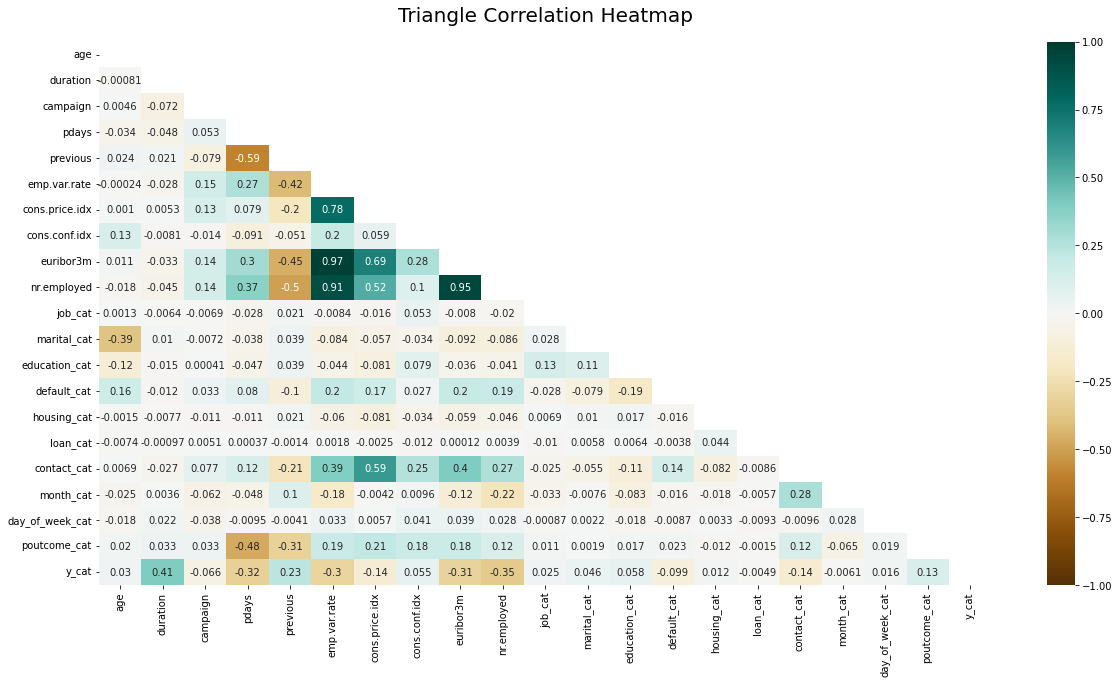

In [89]:
# CORRELATION HEATMAP OF NUMERIC DATAFRAMES
correlationHeatmap(numeric_df.corr())

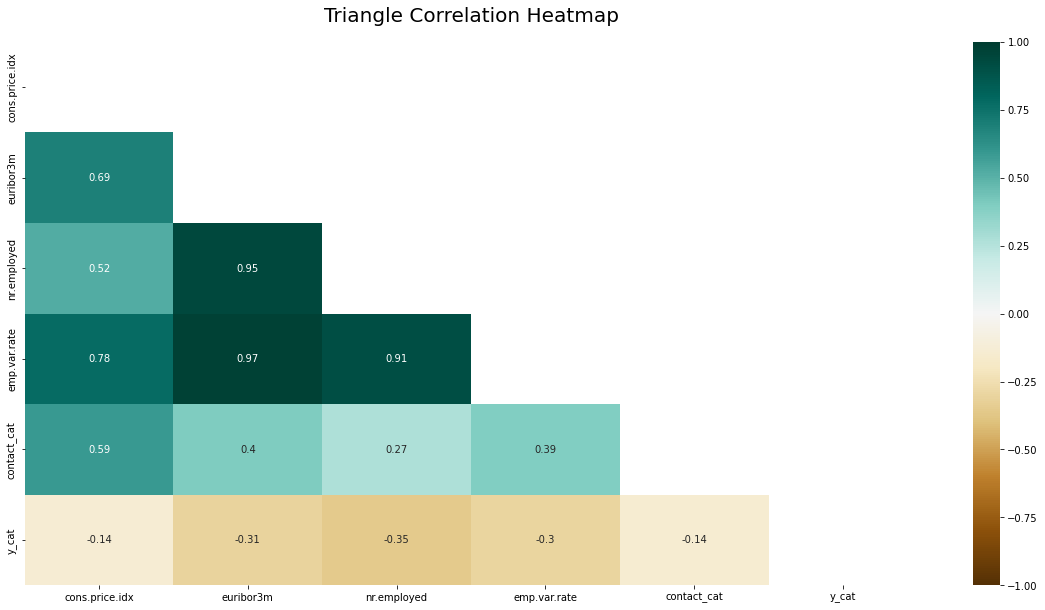

In [90]:
# INVESTIGATING CONS.PRICE.IDX, EURIBOR3M, NR.EMPLOYED, EMP.VAR.RATE, CONTACT
_investigation_columns = [
    'cons.price.idx',
    'euribor3m',
    'nr.employed',
    'emp.var.rate',
    'contact_cat',
    'y_cat'
]
_investigation_df = df[_investigation_columns]
correlationHeatmap(_investigation_df.corr())

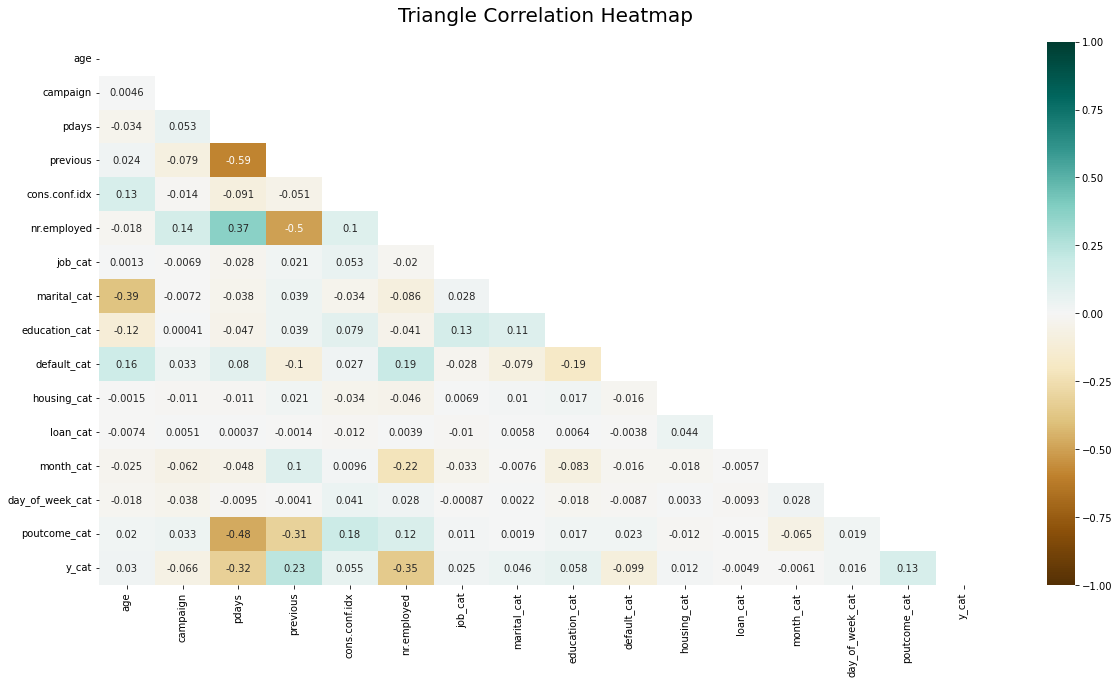

In [117]:
# CORRELATION BASED FEATURE REDUCTION
_remove_columns = _investigation_columns
try:
    _remove_columns.remove('nr.employed')
    _remove_columns.remove('y_cat')
    _remove_columns.append('duration')
except:
    pass
try:
    _reduced_columns = _numeric_columns
    for _column in _remove_columns:
        _reduced_columns.remove(_column)
except:
    pass
reduced_df = df[_reduced_columns]
correlationHeatmap(reduced_df.corr())

Text(0.5, 1.0, 'Scree Plot')

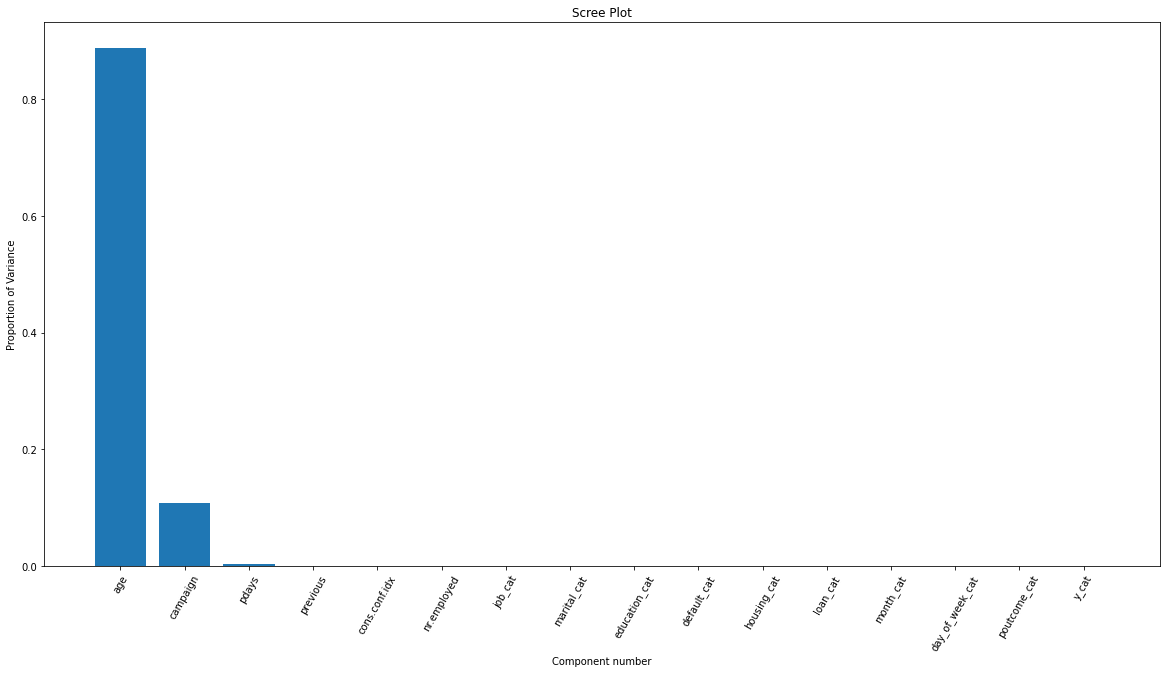

In [138]:
# CHECK FOR VARIANCE
from sklearn.decomposition import PCA
import numpy as np
_normalized_df = reduced_df.copy()

pca = PCA().fit(reduced_df)
plt.figure(figsize=(20,10))
plt.bar(np.arange(1, 17), pca.explained_variance_ratio_)
plt.xticks(np.arange(1, 17), reduced_df.columns, rotation=60)  # Set label locations.
plt.xlabel("Component number")
plt.ylabel("Proportion of Variance")
plt.title("Scree Plot")

In [92]:
# # THE PROBLEM WITH FIRST TIME CALL DATA
# _counts = df.pdays.value_counts()
# print('First time calls represented {:.0%} of the total number of calls.'.format(_counts.max()/df.shape[0]))
# _no = df[df['y']=='no']
# _counts = _no.pdays.value_counts()
# print('{:.0%} of the calls were first time calls where the customer declined the offer.'.format(_counts.max()/df.shape[0]))

In [93]:
# # THE PROBLEM WITH FIRST TIME CALL DATA
# _counts = df.previous.value_counts()
# print('First time calls represented {:.0%} of the total number of calls.'.format(_counts.max()/df.shape[0]))
# _no = df[df['y']=='no']
# _counts = _no.previous.value_counts()
# print('{:.0%} of the calls were first time calls where the customer declined the offer.'.format(_counts.max()/df.shape[0]))

In [94]:
# # KEEP PDAYS COLUMN REMOVE FIRST CALL ROWS

# # prep data
# _ready = assembleReady(df, True, False)
# _data = {
#     'normalized': _ready['normalized'],
#     'all': assembleData(_ready['normalized'], _ready)
# }
# number_of_tests = 0

# # run tests
# no_first_call_result = testLoop(_data, number_of_tests)


# # results 
# if number_of_tests != 0:
#     print(no_first_call_result.normalized_test.mean())
#     print(no_first_call_result.all_test.mean())
# else:
#     print('BYPASSED')

In [95]:
# # REMOVE PDAYS COLUMN

# # prep data
# _ready = assembleReady(df, False, True)
# _data = {
#     'normalized': _ready['normalized'],
#     'all': assembleData(_ready['normalized'], _ready)
# }
# number_of_tests = 0

# # run tests
# removed_pday_column_resut = testLoop(_data, number_of_tests)

# # results
# if number_of_tests != 0:
#     print(removed_pday_column_resut.normalized_test.mean())
#     print(removed_pday_column_resut.all_test.mean())
# else:
#     print('BYPASSED')

In [96]:
# # COMBINATIONS WITH PDAYS REMOVED

# # prep data
# _ready = assembleReady(df, False, True)
# _data = {
#     'normalized': _ready['normalized'],
#     'all': assembleData(_ready['normalized'], _ready)
# }
# number_of_tests = 0

# # run tests
# removed_pday_column_resut = testLoop(_data, number_of_tests)

# # results
# if number_of_tests != 0:
#     print(removed_pday_column_resut.normalized_test.mean())
#     print(removed_pday_column_resut.all_test.mean())
# else:
#     print('BYPASSED')

In [97]:
# runCombinationTests(df, False, True)

In [98]:
# results = pd.read_csv('results.csv')
# print(results.tests.value_counts(ascending=True))

In [99]:
# print(df.dtypes)

In [100]:
# print('age frequency')
# df['age'].hist(bins=100,grid=False,figsize=(7,5))

In [101]:
# print('job frequency')
# df['job'].value_counts().plot(kind='bar',figsize=(7,5))

In [102]:
# print('pdays frequency')
# df['pdays'].hist(grid=False,figsize=(7,5))

In [103]:
# print('job frequency')
# df['job'].value_counts().plot(kind='bar',figsize=(7,5))

In [104]:
# print(df['pdays'].value_counts().head())

In [105]:
# print(df['previous'].value_counts().head())

In [106]:
# print('previous frequency')
# df['previous'].hist(grid=False,figsize=(7,5))

In [107]:
# print('previous frequency')
# df['previous'].hist(by=df['y'],grid=False,figsize=(7,5))

In [108]:
# print('duration frequency')
# df['duration'].hist(by=df['y'],grid=False,figsize=(7,5))

In [109]:
# print('pdays frequency yes or no')
# df['pdays'].hist(by=df['y'],grid=False,figsize=(7,5))

In [110]:
# print('age frequency yes or no')
# df['age'].hist(by=df['y'],grid=False,figsize=(7,5))

In [111]:
# _list = df.columns
# for _i in range(len(_list)):
#     for _j in range(1,len(_list)):
#         if _j > _i:
#             plotContinuous(df,_list[_i],_list[_j],[20,5],[7,5])

In [112]:
# for _column in df.columns:
#     if df[_column].dtype != object:
#         print('{} range : {}'.format(_column, df[column].max()-df[column].min()))

In [113]:
# plotContinuous(df,'age','campaign',[20,5],[7,5])

In [114]:
# from imblearn.over_sampling import SMOTE

# _ready = assembleReady(df, False, True)
# _df = assembleData(df, _ready)
# # _df = getNormalized(df, False)

# # initialize results
# results_train = []
# results_test = []

# for i in range(1):

#     # smote training data
#     oversample = SMOTE()
#     X_smote, y_smote = oversample.fit_resample(_df[_df.columns[:-1]], _df[_df.columns[-1]])
#     _df_smote = pd.concat([X_smote,y_smote], axis=1)

#     # split data
#     _train, _test = train_test_split(
#         _df_smote,
#         test_size=0.2,
#         random_state=randint(0,100)
#     )

#     # readable names
#     X_train = _train[_train.columns[:-1]]
#     X_test = _test[_test.columns[:-1]]
#     y_train = _train[_train.columns[-1]]
#     y_test = _test[_test.columns[-1]]

#     # train
#     mlp = MLPClassifier(
#         hidden_layer_sizes=5,
#         activation='logistic',
#         learning_rate_init=0.5,
#         batch_size=100,
#         solver='sgd',
#         random_state=randint(0,100),
#         max_iter=10000
#     ).fit(X_train,y_train)

#     # get scores
#     result_train = mlp.score(X_train, y_train)
#     result_test = mlp.score(X_test, y_test)
    
#     # save results
#     results_train.append(result_train)
#     results_test.append(result_test)

#     # print out results
#     print('Test: {}'.format(i))
#     print('Training accuracy: {:.8f}'.format(result_train))
#     print('Testing accuracy: {:.8f}'.format(result_test))

# # create dataframe with results
# _df_data = {
#     'train': results_train,
#     'test': results_test
# }
# _write_df = pd.DataFrame.from_dict(_df_data)

# # write to file
# f = open('SMOTE_all_results.txt','w')
# _write_df.to_csv(f)
# f.close()


In [115]:
# print(y_smote[y_smote=='no'].shape[0])
# print(y_smote[y_smote=='yes'].shape[0])

In [116]:
# print(_write_df.train.mean)
# print(_write_df.train.std)